1. Installing Dependencies

In [2]:
!pip install tensorflow -q
!pip install keras -q
# pip install tensorflow tensorflow-addons opencv-python-headless pandas matplotlib seaborn tqdm scikit-learn

2. Importing Libraries

In [3]:
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab import drive
from tqdm import tqdm
from sklearn.model_selection import train_test_split

3. Mounting Google Drive and Extracting Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!cd "/content/drive/MyDrive/cnn/"

In [8]:
import zipfile

zip_file_path = '/content/drive/MyDrive/cnn/archive.zip'
extract_dir = '/content/drive/MyDrive/cnn/lung_cancer_dataset'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Dataset extracted to: {extract_dir}")

Dataset extracted to: /content/drive/MyDrive/cnn/lung_cancer_dataset


4. Organizing Dataset into a DataFrame

In [13]:
data_train = []
type_of_disease = ['Bengin cases', 'Malignant cases', 'Normal cases']
data_directory = f'{extract_dir}/The IQ-OTHNCCD lung cancer dataset/'
train_directory = os.path.join(data_directory)

for id, sp in enumerate(type_of_disease):
    for file in os.listdir(os.path.join(train_directory, sp)):
        data_train.append(['{}/{}/{}'.format(data_directory, sp, file), id, sp])

train = pd.DataFrame(data_train, columns=['Image', 'Id of Disease', 'Type of Disease'])
del data_train
train.head()

,Image,Id of Disease,Type of Disease
0,/content/drive/MyDrive/cnn/lung_cancer_dataset...,0,Bengin cases
1,/content/drive/MyDrive/cnn/lung_cancer_dataset...,0,Bengin cases
2,/content/drive/MyDrive/cnn/lung_cancer_dataset...,0,Bengin cases
3,/content/drive/MyDrive/cnn/lung_cancer_dataset...,0,Bengin cases
4,/content/drive/MyDrive/cnn/lung_cancer_dataset...,0,Bengin cases


5. Randomizing and Preprocessing Data

In [16]:
#make the order of training set randomize
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))
train.head()



,Image,Id of Disease,Type of Disease
0,/content/drive/MyDrive/cnn/lung_cancer_dataset...,1,Malignant cases
1,/content/drive/MyDrive/cnn/lung_cancer_dataset...,2,Normal cases
2,/content/drive/MyDrive/cnn/lung_cancer_dataset...,1,Malignant cases
3,/content/drive/MyDrive/cnn/lung_cancer_dataset...,2,Normal cases
4,/content/drive/MyDrive/cnn/lung_cancer_dataset...,0,Bengin cases


In [18]:
train['Id of Disease'].unique()

array([1, 2, 0])

6. Loading and Preprocessing Images

In [19]:
SIZE_OF_IMAGE = 256
def read_image(imagepath):
    return cv2.imread(imagepath)

def resize_image(image, image_Size):
    return cv2.resize(image.copy(), image_Size, interpolation=cv2.INTER_AREA)

x_train = np.zeros((train.shape[0], SIZE_OF_IMAGE, SIZE_OF_IMAGE, 3))
for i, file in tqdm(enumerate(train['Image'].values)):
    image = read_image(file)
    if image is not None:
        x_train[i] = resize_image(image, (SIZE_OF_IMAGE, SIZE_OF_IMAGE))

X_Train = x_train / 255
print('Train shape: {}'.format(X_Train.shape))
del x_train

1097it [00:09, 117.29it/s]


Train shape: (1097, 256, 256, 3)


7. Preparing Labels

In [20]:
y_train = train['Id of Disease'].values
y_train2 = to_categorical(y_train, num_classes=3)
y_train = np.zeros((y_train2.shape[0]))
for i in range(y_train2.shape[0]):
    if y_train2[i][1] == 1:
        y_train[i] = 1
    else:
        if y_train2[i][2] == 1:
            y_train[i] = 2

8. Splitting Data into Training and Test Sets

In [21]:
BATCH_SIZE = 32
x_train, x_test, y_train, y_test = train_test_split(X_Train, y_train, test_size=0.2, random_state=SEED)
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

print(x_train[8])

x_train shape: (877, 256, 256, 3) - y_train shape: (877,)
x_test shape: (220, 256, 256, 3) - y_test shape: (220,)
[[[0.16470588 0.16470588 0.16470588]
  [0.16470588 0.16470588 0.16470588]
  [0.16470588 0.16470588 0.16470588]
  ...
  [0.16078431 0.16078431 0.16078431]
  [0.16470588 0.16470588 0.16470588]
  [0.16862745 0.16862745 0.16862745]]

 [[0.16078431 0.16078431 0.16078431]
  [0.16862745 0.16862745 0.16862745]
  [0.16862745 0.16862745 0.16862745]
  ...
  [0.16862745 0.16862745 0.16862745]
  [0.16862745 0.16862745 0.16862745]
  [0.16470588 0.16470588 0.16470588]]

 [[0.16470588 0.16470588 0.16470588]
  [0.17254902 0.17254902 0.17254902]
  [0.16862745 0.16862745 0.16862745]
  ...
  [0.16470588 0.16470588 0.16470588]
  [0.16862745 0.16862745 0.16862745]
  [0.17254902 0.17254902 0.17254902]]

 ...

 [[0.16470588 0.16470588 0.16470588]
  [0.16862745 0.16862745 0.16862745]
  [0.16078431 0.16078431 0.16078431]
  ...
  [0.16862745 0.16862745 0.16862745]
  [0.15686275 0.15686275 0.15686275]

9. Defining Vision Transformer (ViT) Parameters

In [22]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 4
num_epochs = 100
image_size = 256
patch_size = 16
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 6
transformer_units = [
    projection_dim * 2,
    projection_dim,]

# Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]

10. Data Augmentation

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

data_augmentation.layers[0].adapt(x_train)


11. MLP Function

In [25]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


12. Patches Layer

In [26]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

13. Visualizing Patches

Image size: 256 X 256
Patch size: 16 X 16
Patches per image: 256
Elements per patch: 768


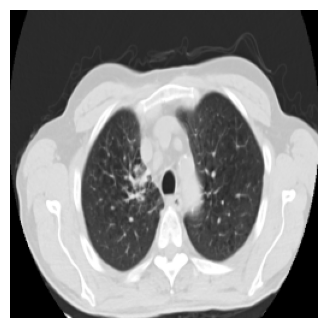

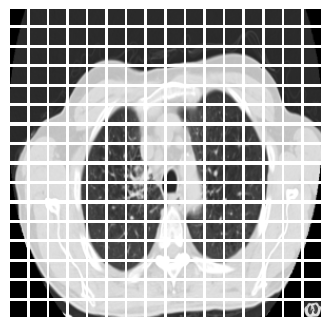

In [27]:
plt.figure(figsize=(4, 4))
image = x_train[5]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(tf.convert_to_tensor([image]), size=(image_size, image_size))
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

image = x_train[5]
# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

14. Patch Encoder Laye

In [28]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

15. Creating the Vision Transformer Model

In [29]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

16. Training the Model

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
def run_experiment(model):
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    return history

17. Running the Experiment

In [32]:
input_shape = (image_size, image_size, 3)
num_classes = 3
vit_classifier = create_vit_classifier()
model = run_experiment(vit_classifier)

Epoch 1/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - accuracy: 0.4640 - loss: 12.9993 - top-2-accuracy: 0.7925 - val_accuracy: 0.5455 - val_loss: 1.8998 - val_top-2-accuracy: 0.9091
Epoch 2/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.5669 - loss: 2.1870 - top-2-accuracy: 0.8105 - val_accuracy: 0.7045 - val_loss: 0.7817 - val_top-2-accuracy: 0.8864
Epoch 3/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.6330 - loss: 1.1168 - top-2-accuracy: 0.8733 - val_accuracy: 0.7273 - val_loss: 0.7938 - val_top-2-accuracy: 0.9091
Epoch 4/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.6221 - loss: 0.9964 - top-2-accuracy: 0.8819 - val_accuracy: 0.6250 - val_loss: 0.8337 - val_top-2-accuracy: 0.7614
Epoch 5/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.6520 - loss: 0.8694 - top-2-accuracy: 0.8891 - val_accuracy: 0.6477 - val_loss: 0.6375 - val_top-2-accuracy: 0.8977
Epoch 6/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 25s 129ms/step - accuracy: 0.67

18. Visualizing Training Results

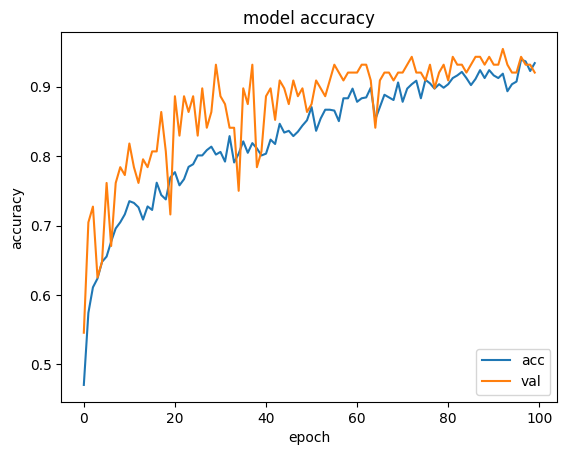

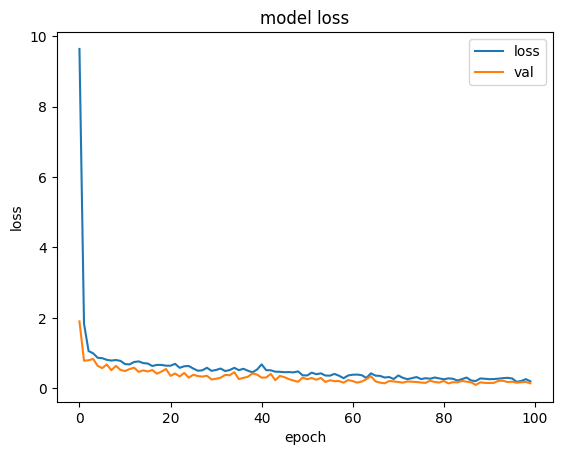

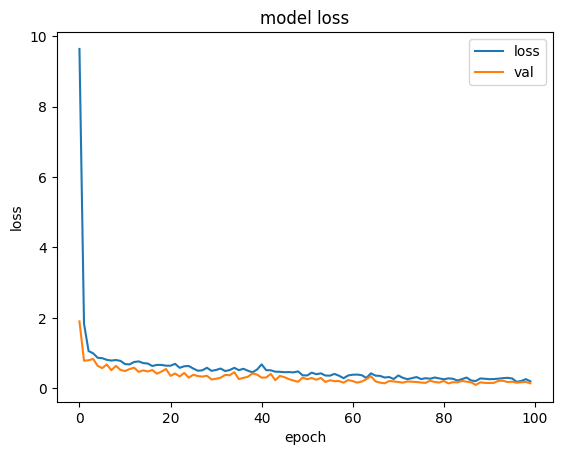

In [33]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel ('epoch')
plt.legend(['acc','val'], loc='lower right')
plt.show()

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['loss','val'], loc='upper right')
plt.show()

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['loss','val'], loc='upper right')
plt.show()

Image size: 256 X 256
Patch size: 16 X 16
Patches per image: 256
Elements per patch: 768


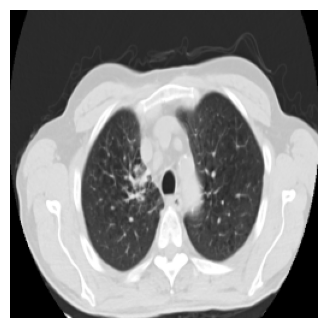

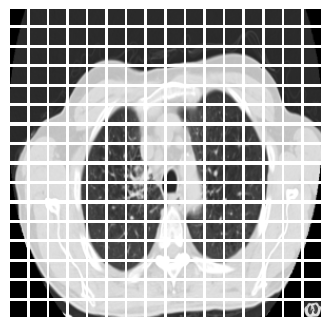

In [34]:
plt.figure(figsize=(4, 4))
image = x_train[5]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(tf.convert_to_tensor([image]), size=(image_size, image_size))
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

image = x_train[5]
# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


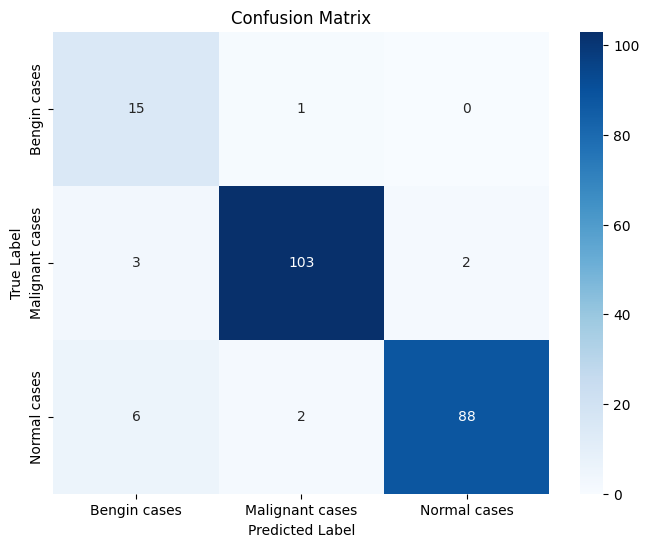

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions
y_pred = vit_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=type_of_disease, yticklabels=type_of_disease)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
def predict_disease(image_path, model, image_size, type_of_disease):
    """
    Predicts the disease type from an image file.

    Args:
        image_path (str): The path to the image file.
        model (keras.Model): The trained model.
        image_size (int): The size to resize the image to.
        type_of_disease (list): A list of disease type names in the order of their IDs.

    Returns:
        str: The predicted disease type.
    """
    # Read and preprocess the image
    image = cv2.imread(image_path)
    if image is None:
        return "Error: Could not read image."

    image = cv2.resize(image, (image_size, image_size))
    image = np.expand_dims(image, axis=0) / 255.0  # Add batch dimension and normalize

    # Make prediction
    predictions = model.predict(image)
    predicted_class_id = np.argmax(predictions, axis=1)[0]

    # Map predicted ID to disease type
    predicted_disease = type_of_disease[predicted_class_id]

    return predicted_disease



In [39]:
# Example usage (replace with an actual image path from your dataset)
test_image_path = '/content/drive/MyDrive/cnn/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/000058_06_02_223.png'
predicted_case = predict_disease(test_image_path, vit_classifier, image_size, type_of_disease)
print(f"The predicted disease case is: {predicted_case}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The predicted disease case is: Malignant cases


In [ ]:
# Save the trained model
model_save_path = '/content/drive/MyDrive/cnn/lung_cancer_vit_model.keras'
vit_classifier.save(model_save_path)
print(f"Model saved to: {model_save_path}")

In [43]:

test_image_path = '/content/drive/MyDrive/cnn/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/000058_06_02_223.png'
predicted_case = predict_disease(test_image_path, vit_classifier, image_size, type_of_disease)
print(f"The predicted disease case is: {predicted_case}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The predicted disease case is: Malignant cases


In [44]:
# Evaluate the trained model on the test set
loss, accuracy, top_2_accuracy = vit_classifier.evaluate(x_test, y_test)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test top 2 accuracy: {top_2_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9335 - loss: 0.1646 - top-2-accuracy: 0.9914
Test loss: 0.1700
Test accuracy: 0.9364
Test top 2 accuracy: 0.9909
